<a href="https://colab.research.google.com/github/xCocco0/alzheimer-recognition/blob/main/alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
This is the description of the project.

---
### Import modules

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [102]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/oasis3-normalized.csv")

### Graphs

---
# TEST

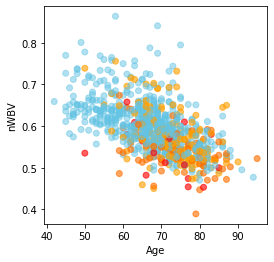

In [191]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(df['Age'], df['nWBV'],
           c=df['cdr'].map({0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}))
plt.xlabel('Age')
plt.ylabel('nWBV')
plt.show()

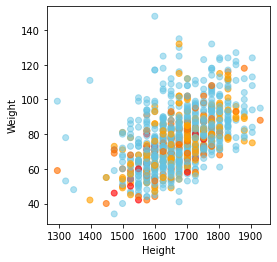

In [188]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(df['Height'], df['Weight'],
           c=df['cdr'].map({0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

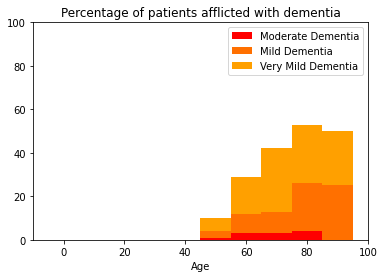

In [174]:
ages = np.zeros((10,5))
ages_labels = np.arange(0,100,10)
mapind = {0.0:1, 0.5:2, 1.0:3, 2.0:4}
for index, row in df.iterrows():
  ages[int(row["Age"]/10), mapind[row["cdr"]]] += 1
  ages[int(row["Age"]/10), 0] += 1
#print(ages)
for row in ages:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(ages)

fig, ax = plt.subplots()
ax.bar(ages_labels, ages[:,4], width = 10, color = "#FF0000", label = "Moderate Dementia")
ax.bar(ages_labels, ages[:,3], width = 10, bottom = ages[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(ages_labels, ages[:,2], width = 10, bottom = ages[:,4]+ages[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(ages_labels, ages[:,1], width = 10, bottom = ages[:,4]+ages[:,3]+ages[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia")
ax.set_ylim(0,100)
ax.set_xlabel("Age")
ax.legend()
plt.show()


# References
- https://www.oasis-brains.org/
- https://www.oasis-brains.org/files/OASIS-3_Imaging_Data_Dictionary_v1.5.pdf
- https://surfer.nmr.mgh.harvard.edu/fswiki/MorphometryStats
- http://www.ajnr.org/content/22/8/1483
- https://jamanetwork.com/journals/jamaneurology/fullarticle/775393